In [31]:
import pandas as pd 
import numpy as np
import prepare , explore
#to see the whole review, display max column width
pd.set_option('display.max_colwidth', None)
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set_palette("colorblind")
sns.set_style('darkgrid')

# Rate My Review
## An Analysis on Hotel reviews in Texas
#### Xavier Carter, September 2021

----

#### The Dataset
- Using Selinium, 13,800 reviews were gathered from various hotels across 4 major cities in Texas (Houston, Austin, Dallas, San Antonio)

#### Project Goals
- Analyze reviews to understand correlation to the review rating and the review. 
- Build a machine learning model to predict what rating a review should get.

#### Executive Summary
- Executive Summary here

----

## Acquire
- Utilizing Selinium (see acquire1.py and acquire2.py) , Gathering review information from TripAdvisor.com
- For sake of time, the max number of reviews looked at for each hotel was maxed to 35, as some hotels had hundreds of reviews

In [2]:
df = pd.read_csv('hotel_data.csv')

In [3]:
df.head(2)

,hotel_name,hotel_city,date_of_stay,review_rating,review
0,Drury Plaza Hotel San Antonio Riverwalk,San Antonio,September 2021,5,Joseph was so helpful and attentive! Awesome customer service. Made our trip more enjoyable! This will now be our go to hotel when we come to San Antonio. Everything about the hotel was nice and the staff was very friendly. Very pleased with the whole experience.
1,Drury Plaza Hotel San Antonio Riverwalk,San Antonio,September 2020,5,"We stayed one night at the Drury Plaza Riverwalk in mid-September. Sooo enjoyed our stay. Definitely our favorite hotel on the Riverwalk. We specifically stayed here for the rooms with the balconies overlooking the San Fernando Cathedral. I sat on that balcony all day long, reading and enjoying the view, even despite the day of rain! Love the separate bedroom! The afternoon happy hour could have easily sufficed for dinner had the allure of the Riverwalk restaurants not been there. The indoor pool/hot tub was nice, and the fitness center was perfectly equipped with great views while running the treadmill. The breakfast was hearty and very good quality...love that they have biscuits and gravy! Every employee we encountered was upbeat and kind and seemed to be interested in serving"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13801 entries, 0 to 13800
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   hotel_name     13801 non-null  object
 1   hotel_city     13801 non-null  object
 2   date_of_stay   13801 non-null  object
 3   review_rating  13801 non-null  int64 
 4   review         13801 non-null  object
dtypes: int64(1), object(4)
memory usage: 539.2+ KB


In [5]:
df.isna().sum()

hotel_name       0
hotel_city       0
date_of_stay     0
review_rating    0
review           0
dtype: int64

In [6]:
df.describe()

,review_rating
count,13801.000000
mean,3.622564
std,1.559053
min,1.000000
25%,2.000000
50%,4.000000
75%,5.000000
max,5.000000


In [7]:
for i in df.columns:
    print(df[i].value_counts())
    print('---------------------------')

La Cantera Resort & Spa                                   70
Fairmont Austin                                           70
Wyndham Garden Dallas North                               35
Hilton Garden Inn San Antonio At The Rim                  35
Microtel Inn & Suites by Wyndham San Antonio Northeast    35
                                                          ..
Kasa Dallas West End Apartments                            1
Palace Inn Beltway & Westview                              1
GreenTree Hotel Houston Hobby                              1
Grand Inn                                                  1
OYO Hotel San Antonio Near AT&T Center                     1
Name: hotel_name, Length: 548, dtype: int64
---------------------------
Austin         4033
San Antonio    3633
Houston        3574
Dallas         2561
Name: hotel_city, dtype: int64
---------------------------
 August 2021      1356
 July 2021        1215
 June 2021         696
 February 2020     696
 May 2021          695
   

#### Acquire Findings 

#### TO-Do's:
1). The cap for reviews was 35, each review being unique, since value counts of 70 and 2 were seen, duplicates exist in the data. duplicates need to be removed.

2). Month and year can be in their own seperate columns.

3.) no null values or missing values. 

4.) Standardize english words using NLP processing, Standard cleaning using NLTK.

----

## Prepare
- In Preperation, we will
     * Drop Duplicates
     * Split month and year into seperate columns 
     * Drop date of stay column
     * Prep review content (Basic cleaning, tokenizing, lemmentizing, removing stop words, excluding common negative stop words)
     * Makeing columns for word and letter count
     * creating columns for negative , postive and neautral sentiment from cleaned version of the review (post clean, tokenize , lemmatized, and stop words removed, keeping popular negative stop words as negative stops words have the power to change the meaning of the review)
     * create bins for sentiment columns for exploration

In [8]:
df = prepare.prep_review_data(df)

In [9]:
df.head(3)

,hotel_name,hotel_city,review_rating,review,month_of_stay,year_of_stay,review_cleaned,message_length,word_count,positive_sentiment,negative_sentiment,neatral_sentiment
0,Drury Plaza Hotel San Antonio Riverwalk,San Antonio,5,Joseph was so helpful and attentive! Awesome customer service. Made our trip more enjoyable! This will now be our go to hotel when we come to San Antonio. Everything about the hotel was nice and the staff was very friendly. Very pleased with the whole experience.,September,2021,oseph helpful attentive wesome customer service ade trip enjoyable go hotel come ntonio verything hotel nice staff friendly ery pleased whole experience,152,22,0.462,0.0,0.538
1,Drury Plaza Hotel San Antonio Riverwalk,San Antonio,5,"We stayed one night at the Drury Plaza Riverwalk in mid-September. Sooo enjoyed our stay. Definitely our favorite hotel on the Riverwalk. We specifically stayed here for the rooms with the balconies overlooking the San Fernando Cathedral. I sat on that balcony all day long, reading and enjoying the view, even despite the day of rain! Love the separate bedroom! The afternoon happy hour could have easily sufficed for dinner had the allure of the Riverwalk restaurants not been there. The indoor pool/hot tub was nice, and the fitness center was perfectly equipped with great views while running the treadmill. The breakfast was hearty and very good quality...love that they have biscuits and gravy! Every employee we encountered was upbeat and kind and seemed to be interested in serving",September,2020,e stayed one night rury laza iverwalk mideptember ooo enjoyed stay efinitely favorite hotel iverwalk e specifically stayed room balcony overlooking ernando athedral sat balcony day long reading enjoying view even despite day rain ove separate bedroom afternoon happy hour could easily sufficed dinner allure iverwalk restaurant not indoor poolhot tub nice fitness center perfectly equipped great view running treadmill breakfast hearty good qualitylove biscuit gravy employee encountered upbeat kind seemed interested serving,525,73,0.392,0.0,0.608
2,Drury Plaza Hotel San Antonio Riverwalk,San Antonio,5,"On a very busy weekend, I had the pleasure of experiencing, Excellent customer service and very friendly Felt I made the right choice staying here Johnny and ZOE made me feel special And they were busy",September,2021,n busy weekend pleasure experiencing xcellent customer service friendly elt made right choice staying ohnny made feel special nd busy,133,20,0.375,0.0,0.625


----

## Outliers 
- Here , we'll take a look at possible anomolies
     * looking at positive sentiment reviews with low ratings
     * looking at negative sentiment reviews with high ratings

In [10]:
postive_when_neg  = (df.positive_sentiment  >= .450) & (df.review_rating == 1)
negative_when_pos = (df.negative_sentiment  >= .450) & (df.review_rating == 5)

In [11]:
df[postive_when_neg].sample(3)

,hotel_name,hotel_city,review_rating,review,month_of_stay,year_of_stay,review_cleaned,message_length,word_count,positive_sentiment,negative_sentiment,neatral_sentiment
12994,Hilton Garden Inn San Antonio At The Rim,San Antonio,1,"Fabulous stay. The front desk staff was friendly and helpful. I enjoyed the breakfast daily and the breakfast crew as well. Room 404 - temperature control was excellent, I could adjust from heat to cool without issues. Necessary because of the temperature swings",November,2019,abulous stay front desk staff friendly helpful enjoyed breakfast daily breakfast crew well oom 404 temperature control excellent could adjust heat cool without issue ecessary temperature swing,192,27,0.453,0.000,0.547
8552,Hotel ZaZa Memorial City,Houston,1,I tried to book a birthday party at the hotel. The hotel party coordinator made written discriminatory comments to me and she refused to put the amount that I had agreed to pay for the party event in the party contract which resulted in me having to call my family and friends and cancel the party.,March,2021,tried book birthday party hotel hotel party coordinator made written discriminatory comment refused put amount agreed pay party event party contract resulted call family friend cancel party,189,27,0.454,0.135,0.411
12130,Best Western Plus Northwest Inn & Suites,Houston,1,The place smelled. The ac struggled to cool. The lobby needed better air flow. The pool is still not open. The Togo breakfast is a joke. The workers are the best assets this location has going for it.,June,2021,place smelled ac struggled cool lobby needed better air flow pool still not open ogo breakfast joke worker best asset location ha going,135,23,0.503,0.069,0.429


In [12]:
df[negative_when_pos]

,hotel_name,hotel_city,review_rating,review,month_of_stay,year_of_stay,review_cleaned,message_length,word_count,positive_sentiment,negative_sentiment,neatral_sentiment
13793,Econo Lodge Inn & Suites,Dallas,5,"Service of staff was a little bad and rude, In the lobby the didn't have the uniform. And the location is not good, is very dangerous.",March,2014,ervice staff little bad rude n lobby uniform nd location not good dangerous,75,13,0.134,0.499,0.367


#### Most of these may be miss clicked, as these people may wanted to rate higher or lower then their sentiment may suggest. so we will remove these from the dataframe as outliers so our model isnt trained in a way that might skew the results.

In [13]:
df = prepare.remove_outliers(df)

In [14]:
len(df)

13721

### Split Model 

In [15]:
train, validate, test = prepare.split_for_model(df,'review_rating')

(7683, 12),(3293, 12),(2745, 12)


## Explore - Distiributions, Length and Sentiment

### univariate 

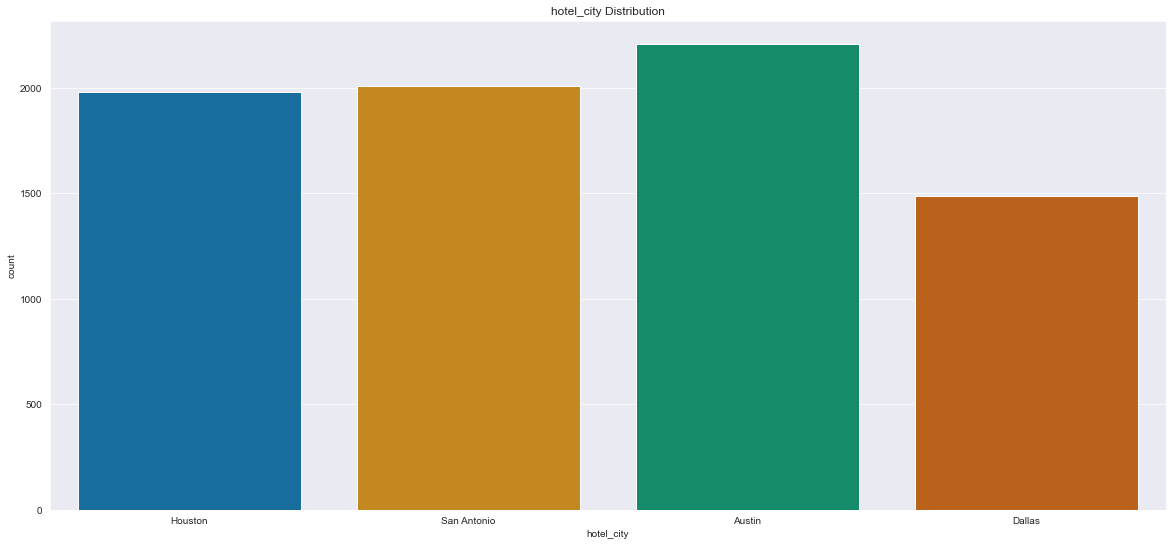

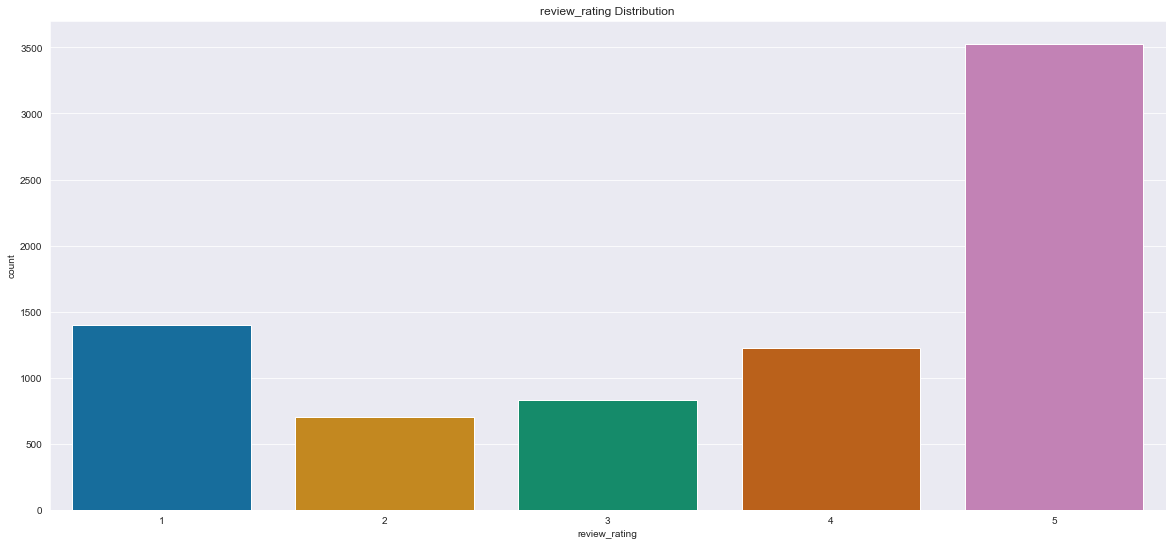

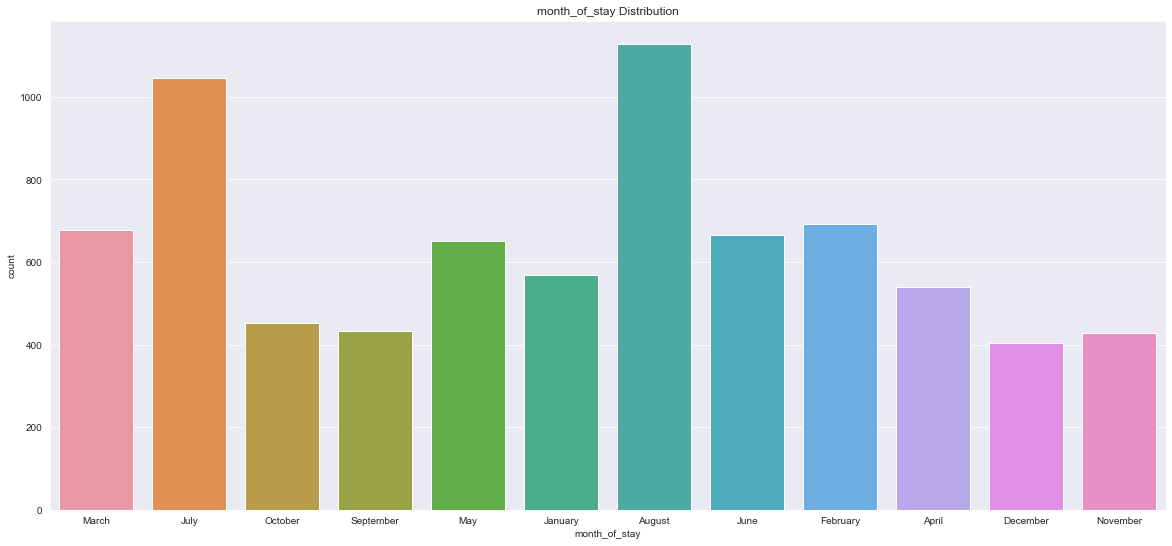

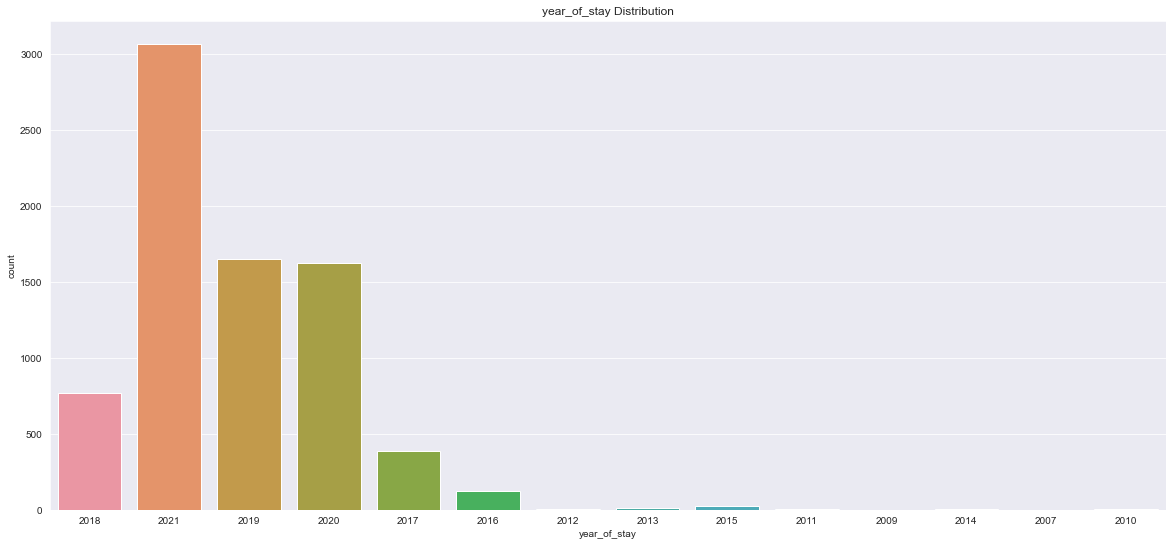

In [16]:
explore.get_distribution(train.drop(columns=['hotel_name','review', 'review_cleaned','positive_sentiment','negative_sentiment', 'neatral_sentiment','message_length', 'word_count']))

### Bivariate

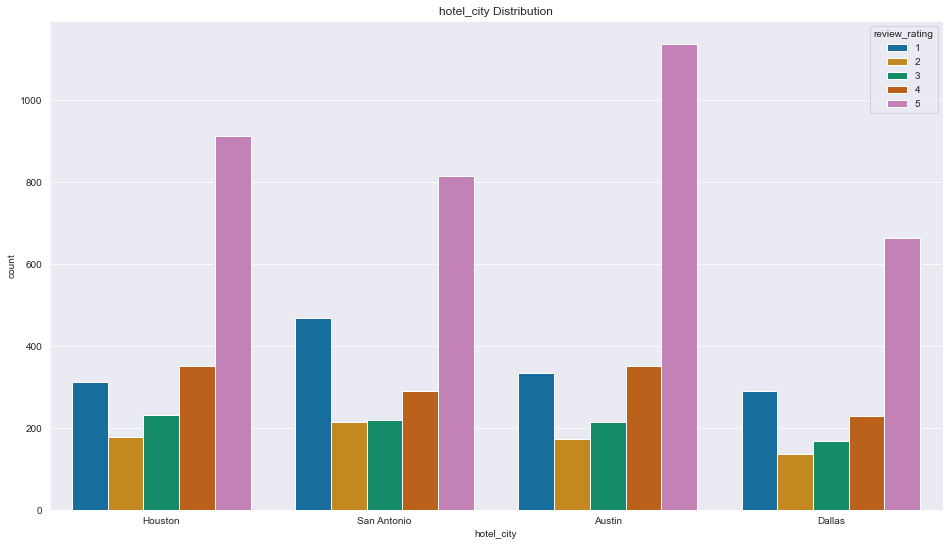

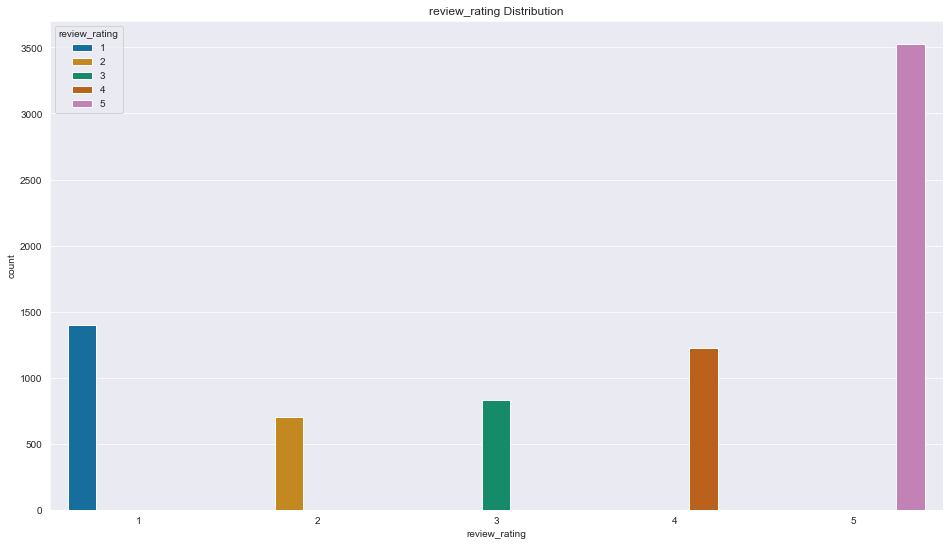

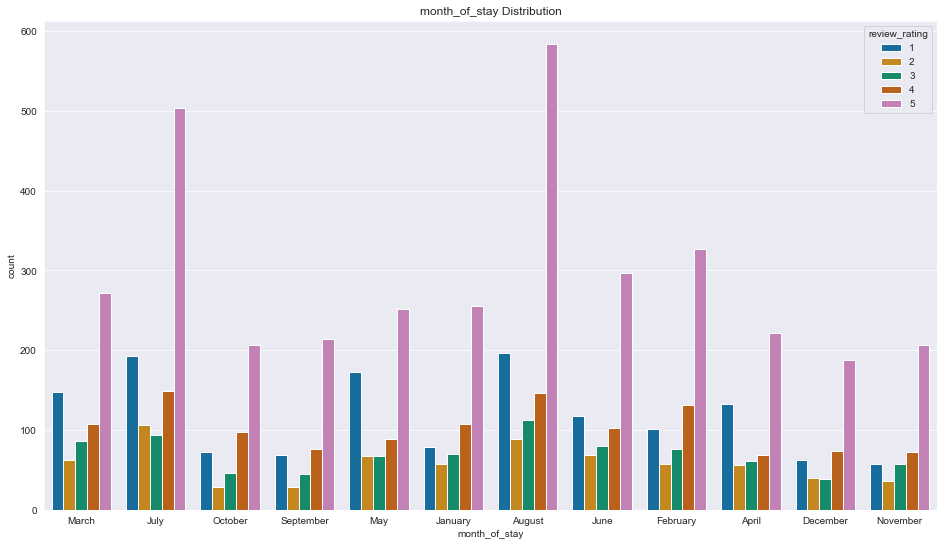

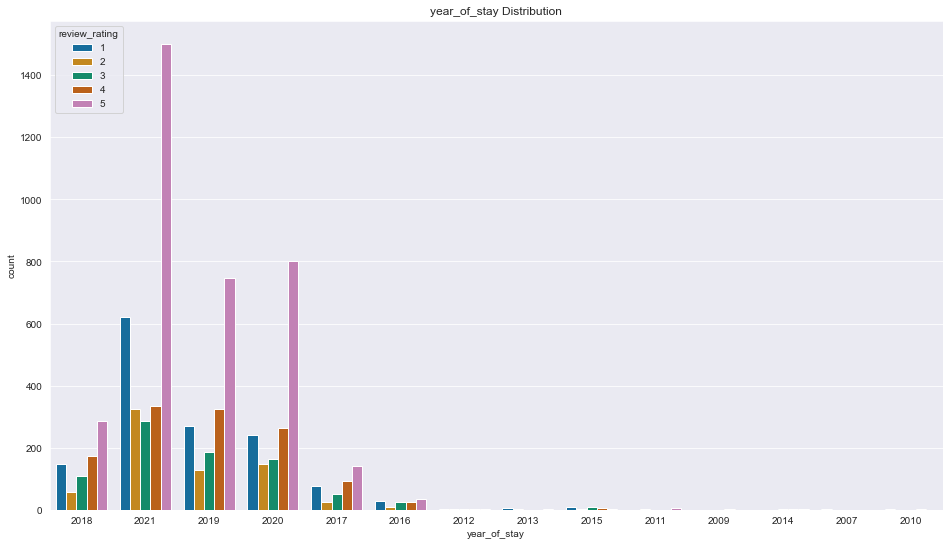

In [17]:
explore.compare_to_target(train.drop(columns=['hotel_name','review', 'review_cleaned','positive_sentiment','negative_sentiment', 'neatral_sentiment','word_count', 'message_length']), 'review_rating')

### Does word count and message length differ for different review ratings?

Text(0, 0.5, 'word_count')

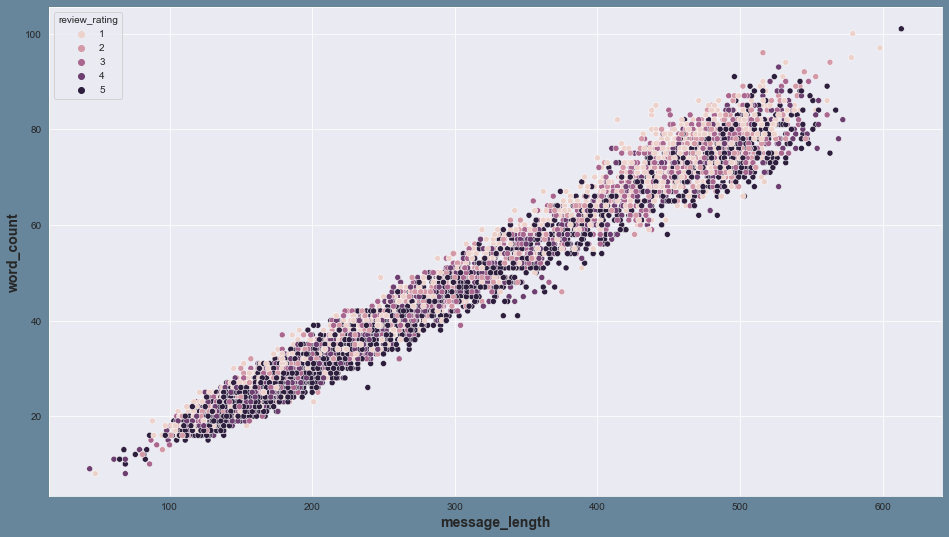

In [18]:
plt.figure(figsize=(16,9),facecolor='#67869b') 
sns.scatterplot(data = train, x = 'message_length', y ='word_count', hue='review_rating')
plt.xlabel('message_length',fontweight='bold', fontsize=14)
plt.ylabel('word_count',fontweight='bold', fontsize=14) 

### Average Message length for each review score?

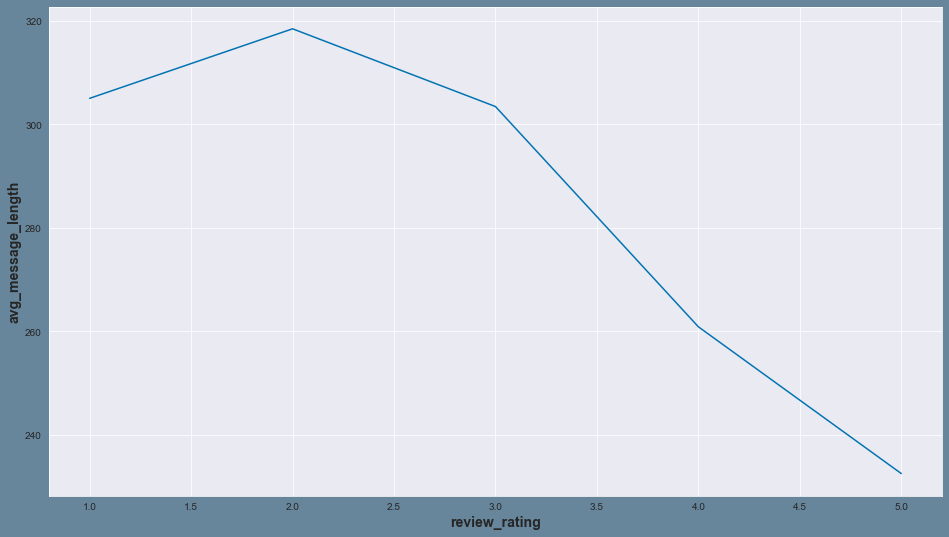

In [19]:
plt.figure(figsize=(16,9),facecolor='#67869b') 
group = train.groupby(['review_rating']).agg(avg_message_length =("message_length", 'mean'))
group = group.reset_index()
plt.xlabel('review_rating',fontweight='bold', fontsize=14)
plt.ylabel('avg_message_length',fontweight='bold', fontsize=14) 
sns.lineplot(data=group, x = 'review_rating', y = 'avg_message_length')
plt.show()

### Average Word Count for each review score?

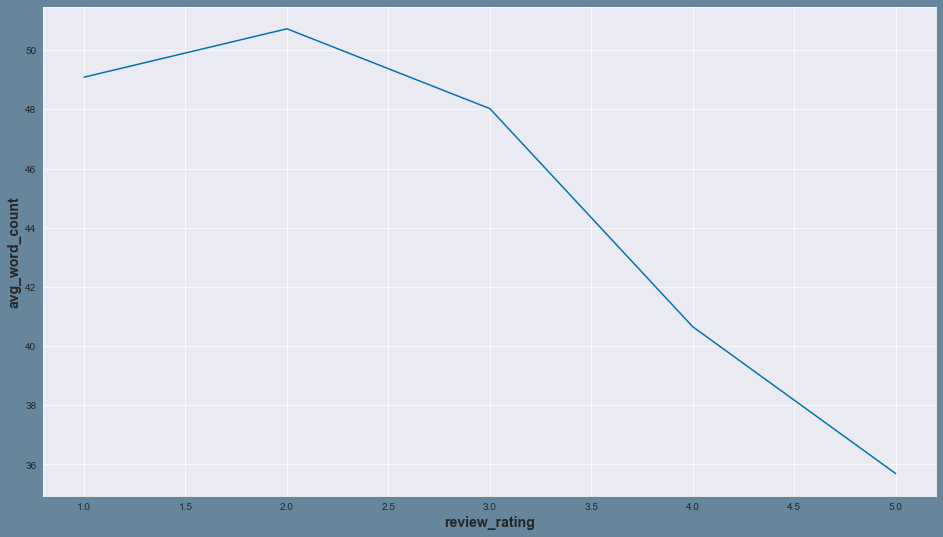

In [20]:
plt.figure(figsize=(16,9),facecolor='#67869b') 
group = train.groupby(['review_rating']).agg(avg_word_count =("word_count", 'mean'))
group = group.reset_index()
sns.lineplot(data=group, x = 'review_rating', y = 'avg_word_count')
plt.xlabel('review_rating',fontweight='bold', fontsize=14)
plt.ylabel('avg_word_count',fontweight='bold', fontsize=14) 
plt.show()

### Average rating for each city?

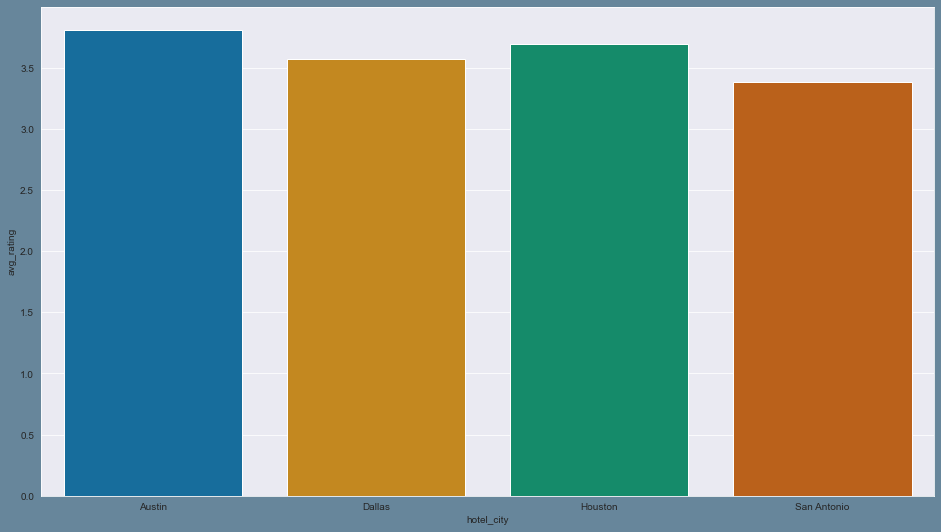

In [21]:
plt.figure(figsize=(16,9),facecolor='#67869b') 
group = train.groupby(['hotel_city']).agg(avg_rating =("review_rating", 'mean'))
group = group.reset_index()
sns.barplot(data=group, x = 'hotel_city', y = 'avg_rating')
plt.show()

### Average Rating for each month? 

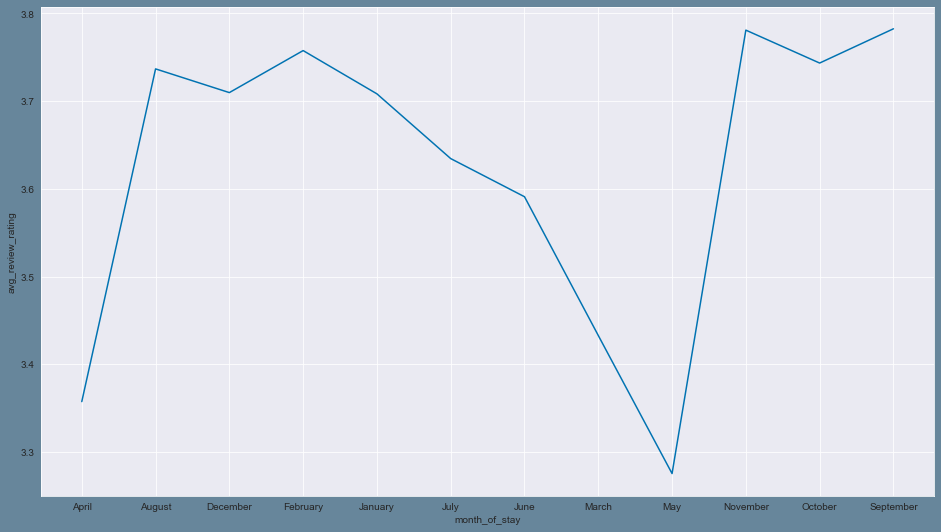

In [22]:
plt.figure(figsize=(16,9),facecolor='#67869b') 
group = train.groupby(['month_of_stay']).agg(avg_review_rating =("review_rating", 'mean'))
group = group.reset_index()
sns.lineplot(data=group, x = 'month_of_stay', y = 'avg_review_rating')
plt.show()

### Average Sentiment for each review rating?

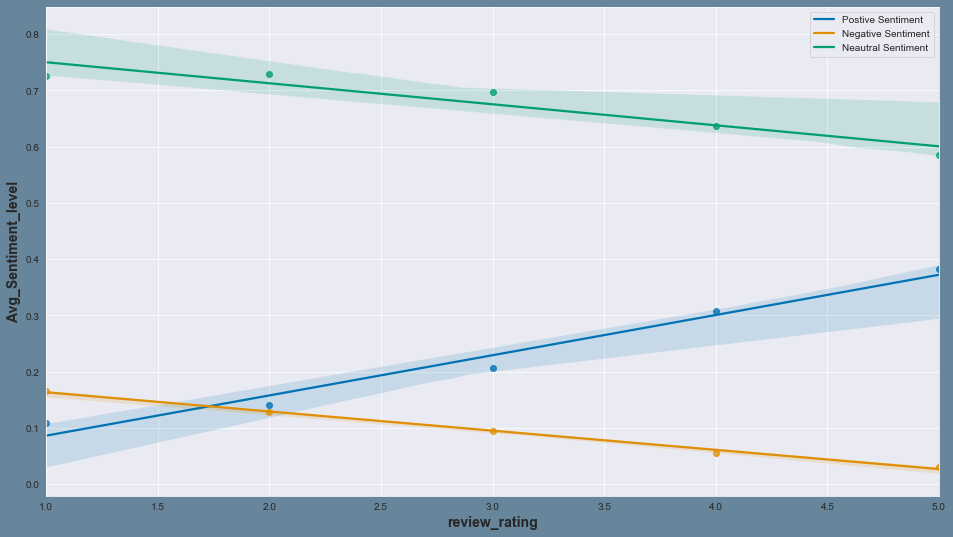

In [23]:
plt.figure(figsize=(16,9),facecolor='#67869b') 
group = train.groupby(['review_rating']).agg(avg_pos_sent =("positive_sentiment", 'mean'), avg_neg_sent =('negative_sentiment', 'mean'), avg_neu_sent =('neatral_sentiment', 'mean'))
group = group.reset_index()
sns.regplot(data=group, x = 'review_rating', y = 'avg_pos_sent')
sns.regplot(data=group, x = 'review_rating', y = 'avg_neg_sent')
sns.regplot(data=group, x = 'review_rating', y = 'avg_neu_sent')
plt.xlabel('review_rating',fontweight='bold', fontsize=14)
plt.ylabel('Avg_Sentiment_level',fontweight='bold', fontsize=14) 
plt.legend(labels=['Postive Sentiment','Negative Sentiment','Neautral Sentiment'])
plt.show()

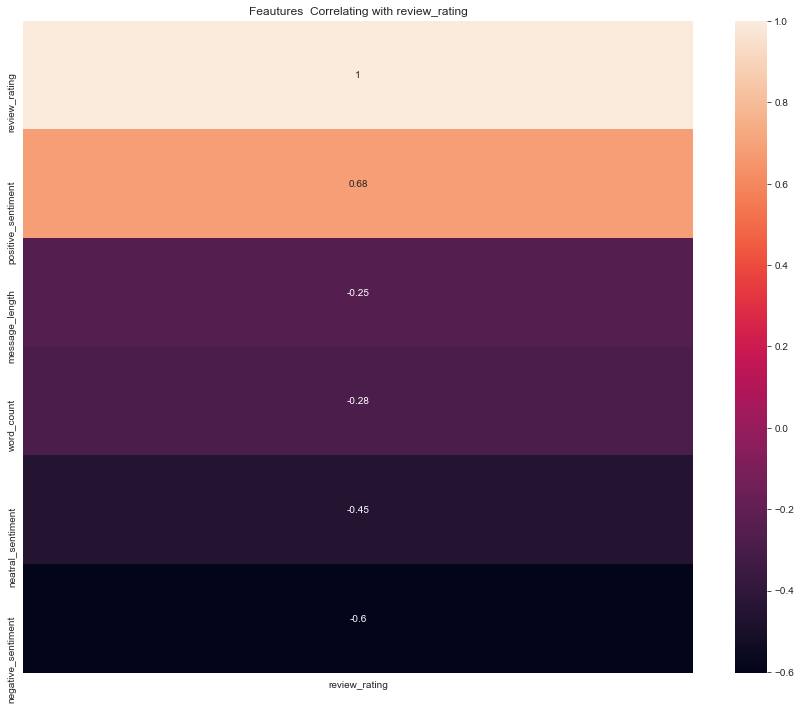

<AxesSubplot:title={'center':'Feautures  Correlating with review_rating'}>

In [24]:
explore.get_heatmap(train, 'review_rating')

#### Takeaways 

- Univariate
    * When selecting reviews at random, theyre were more 5 star reviews, followed by one star reviews. Hinting may tend to be obligated to write a review  when they either really loved their stay , or despised it.
    * When collecting reviews at random, many of the hotel stays took place in Auguest, followed by July and May. Mid-summer and spring break time seem to be the most popular times to visit hotels, while the least month of stay was september and november.
- Bivariate, in relation to review rating
    * Hotel Ratings for each city were still distributed in order as follows: 5,1,4,3,2 
    * The distrubution differs over the various months 
- Multivariate
    * Word count and message length decrease on average as the review gets better. suggesting when bad reviews have more words on average.
    * Austin and Houston have the best reviews on average, while San Antonio had the worst reviews on average
    * In terms of sentiment, Negative sentiment decreases as review ratings get higher, Positive sentiment increases as reviews get higher, Neatural sentiment is higher in negative reviews then positive sentiment.
    

## Explore - Word Analysis 

In [25]:
#Split words into strings 

In [26]:
one_read = ' '.join(train[train.review_rating == 1].review_cleaned)
two_read = ' '.join(train[train.review_rating == 2].review_cleaned)
three_read = ' '.join(train[train.review_rating == 3].review_cleaned)
four_read = ' '.join(train[train.review_rating == 4].review_cleaned)
five_read = ' '.join(train[train.review_rating == 5])
all_read = ' '.join(train.review_cleaned)

In [30]:
#creating word frequencies
one_freq = pd.Series(one_read.split()).value_counts()
two_freq = pd.Series(two_read.split()).value_counts()
three_freq= pd.Series(three_read.split()).value_counts()
four_freq= pd.Series(four_read.split()).value_counts()
five_freq = pd.Series(five_read.split()).value_counts()
all_freq = pd.Series(all_read.split()).value_counts()

In [32]:
#create word list
one_star_words = re.sub(r'[^\w\s]', '', one_read).split()
two_star_words = re.sub(r'[^\w\s]', '', two_read).split()
three_star_words = re.sub(r'[^\w\s]', '', three_read).split()
four_star_words = re.sub(r'[^\w\s]', '', four_read).split()
five_star_words = re.sub(r'[^\w\s]', '', five_read).split()
all_words = re.sub(r'[^\w\s]', '', all_read).split()

In [119]:
#Creating word counts table
word_table = (pd.concat([one_freq, two_freq, three_freq, four_freq, five_freq,  all_freq], axis=1, sort=True)
                .fillna(0)
                .apply(lambda s: s.astype(int)))
#naming the columns
word_table.columns = ['one', 'two', 'three', 'four', 'five', 'All']

In [124]:
def show_distributions(word_table, orderby=None):
    plt.rc('figure', figsize=(16,9))
    (word_table
 .assign(one = word_table[orderby]  )
 .sort_values(orderby)
 [[orderby]]
 .tail(20)
 .sort_values(orderby)
 .plot.barh(stacked=True))
    

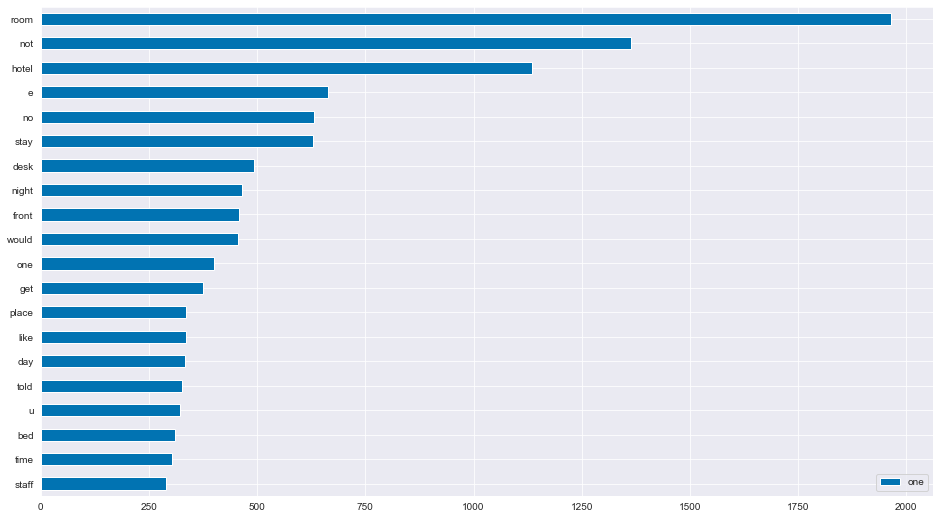

In [125]:
show_distributions(word_table, 'one')

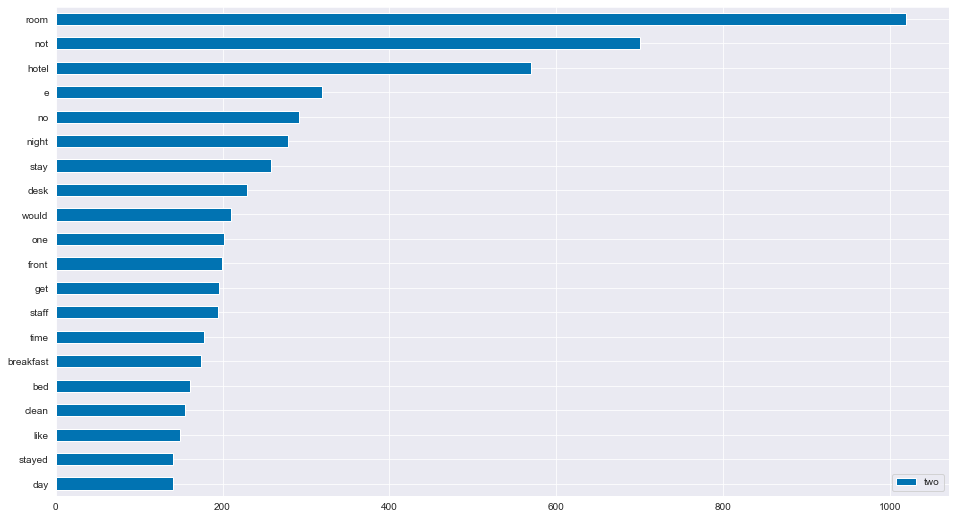

In [126]:
show_distributions(word_table, 'two')

show_distributions(word_table, 'two')

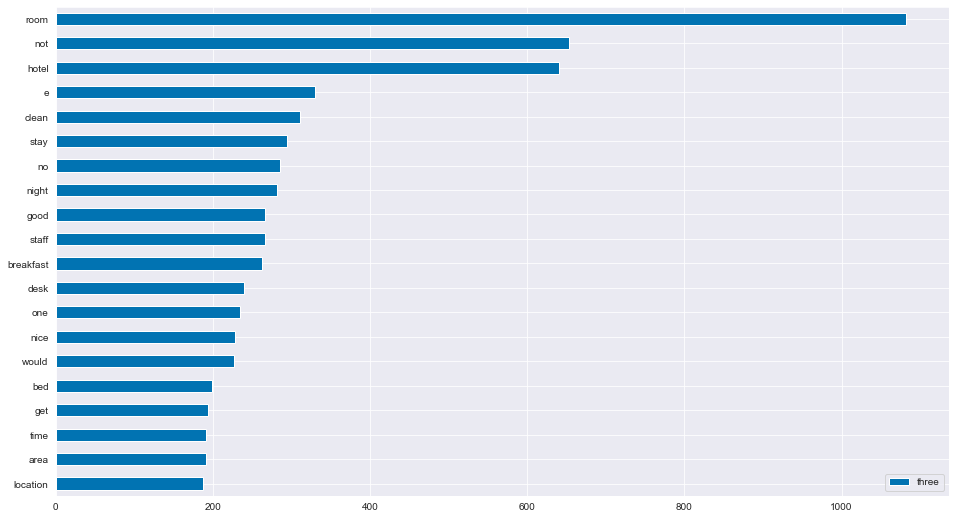

In [127]:
show_distributions(word_table, 'three')

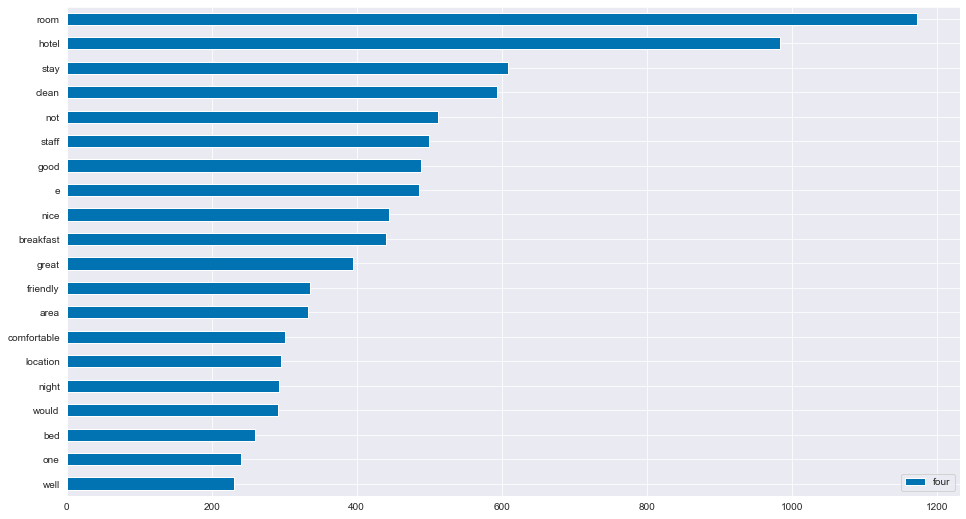

In [128]:
show_distributions(word_table, 'four')